Below is working code from the previous' session PCW:

In [ ]:
class Node:
    """ 
    A Node class for the Binary Search Tree class

    Attributes
    ----------
    l_child: Node/ None
        The left child of the node.
        If exists, the left child's data is smaller than the node's.
    r_child: Node/ None
        The right child of the node.
        If exists, the right child's data is larger than or equal to the node's.
    parent: Node/ None
        The parent of the node
    data: int
        The data of the node.
    """  
    def __init__(self, data):
        """
        Parameters
        ----------
        data: int
            The data of the node.
        """ 
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = data

    def __repr__(self):
        return f"Node {self.data}"

    def find_min(self):
        """
        Find the minimum node from the node's subtree

        Parameters
        ----------
        None

        Returns
        ----------
        Node
            The minimum node from the node's subtree

        """
        current = self
        while current.l_child is not None:
            current = current.l_child
        return current
    

    def next_largest(self):
        """
        Find the node with the next largest value compared to the current node

        Parameters
        ----------
        None

        Returns
        ----------
        Node
            The node with the next largest value

        """
        if self.r_child is not None:
            return self.r_child.find_min()
        current = self
        while current.parent is not None and current is current.parent.r_child:
            current = current.parent
        return current.parent

class BinarySearchTree:

    def __init__(self):
        self.root = None

    def to_string(self): 
        """
        Print the Binary Search Tree

        Parameters
        ----------
        None

        Returns
        ----------
        None
        """
        if self.root is None: 
            return 'Nil'
        self._print_tree(self.root, 0)

    def _print_tree(self, root, depth):
        """
        Recursively print the tree from the root

        Parameters
        ----------
        root: Node/ None
            the root of the subtree, if it exists
        depth: int
            the depth of the tree

        Returns
        ----------
        None
        """
        if not root: 
            return
        self._print_tree(root.l_child, depth + 1) 
        print('\t'* depth + '➡️ Node'+ str(root.data) +'')
        self._print_tree(root.r_child, depth + 1) 
        
        

    def insert(self, node):
        """
        Insert a node/ value of the node into the tree

        Parameters
        ----------
        node: Node/ int
            the node or the value of the node

        Returns
        ----------
        None
        """

        if type(node) is int: 
            node = Node(node)

        if self.root is None:
            self.root = node
            return
        else:
            self._insert_node(node, self.root)

    def _insert_node(self, node, root):
        """
        Insert a node into an existing subtree

        Parameters
        ----------
        root: Node
            the root of the subtree
        node: Node
            the node to be inserted

        Returns
        ----------
        None
        """
        if root.data > node.data:
            if root.l_child is None:
                root.l_child = node
                node.parent = root
            else:
                self._insert_node(node, root.l_child)
        else:
            if root.r_child is None:
                root.r_child = node
                node.parent = root
            else:
                self._insert_node(node, root.r_child)

    def delete(self, value):
        """
        Delete the first node with the value found from the Binary Search Tree
        if it exists

        Parameters
        ----------
        value: int
            the value of the node to be removed

        Returns
        ----------
        Node/ None
            the node if it is found and deleted, otherwise None
        """
        node = self.search(value)
        if node is None:
            return None
        if node is self.root:
            pseudoroot = Node(None)
            pseudoroot.l_child = self.root
            self.root.parent = pseudoroot
            deleted = self._delete_node(self.root)
            self.root = pseudoroot.l_child
            if self.root is not None:
                self.root.parent = None
                return deleted
        else:
            return self._delete_node(node)

    def _delete_node(self, node):
        """
        Delete a specific node from the Binary Search Tree

        Parameters
        ----------
        node: Node
            the node to be removed

        Returns
        ----------
        Node
            the node that has been removed
        """
        if node.l_child is None or node.r_child is None:
            if node.parent.l_child is node:
                node.parent.l_child = node.l_child or node.r_child
                if node.parent.l_child is not None:
                    node.parent.l_child.parent = node.parent
            else:
                node.parent.r_child = node.r_child or node.l_child
                if node.parent.r_child is not None:
                    node.parent.r_child.parent = node.parent
            return node
        else:
            replacement = node.next_largest()
            replacement.data, node.data = node.data, replacement.data
            return self._delete_node(replacement)

    def search(self, value):
        """
        Search for a value in the Binary Search Tree

        Parameters
        ----------
        value: int
            the value that needs to be searched

        Returns
        ----------
        Node/ None
            the first node found, or None
        """
        if self.root is None:
            return None
        else:
            return self._search_value(value, self.root)

    def _search_value(self, value, root):
        """
        Search for a value from the root of the subtree

        Parameters
        ----------
        value: int
            the value that needs to be searched
        root: Node/ None
            the root of the subtree to search the value

        Returns
        ----------
        Node/ None
            the first node found, or None
        """
        if not root:
            return None
        if value == root.data:
            return root
        elif value < root.data:
            return self._search_value(value, root.l_child)
        else:
            return self._search_value(value, root.r_child)
    
    def inorder(self):
        """
        Return an array of the values in the tree in sorted order

        Parameters
        ----------
        None

        Returns
        ----------
        list
            the array of values in sorted order
        """
        if not self.root: 
            return []
        lst = []
        root = self.root
        def sub_inorder(root):
            if root is not None:
                sub_inorder(root.l_child)
                lst.append(root.data)
                sub_inorder(root.r_child)
        sub_inorder(root)
        return lst

##Question 1
Complete the following function that computes the depth of a given node in a BST identified by its root. Check that your code works properly by running the test case.

In [ ]:
def depth(bst, node):
    """
    Finds the depth of the node in a BST. Depth of root is 0.

    Parameters
    ----------
    node: Node
        An existing node in the BST that we need to compute the depth of

    Returns
    ----------
    int
        the depth from root of the tree to node
    """
    # your code here
    current_node = node
    depth = 0
    while current_node.parent != None:
        current_node = current_node.parent
        depth += 1
    
    return depth


import math
bst = BinarySearchTree()
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    bst.insert(node)
for i in range(len(nodes)):
    assert(depth(bst, nodes[i]) == int(math.log(i+1,2)))

##Question 2
Complete the following function, making use of depth, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                        12
                          \
                           14
will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons). In total, this means an average of (1+2)/2=1.5 comparisons.

You can test your function with this test case and others.



Hint: the number of comparisons required to search for node a is depth(root, a) + 1.

In [ ]:
def average_comparisons(bst):
    """
    Finds the average number of comparisons required 
    to search for a randomly chosen element of a standard BST. 

    Parameters
    ----------
    bst: BinarySearchTree
        The binary search tree to find the comparisons

    Returns
    ----------
    float
        the average number of comparisons
    """
    # your code here
    average = 0
    nodes = bst.inorder()
    for node in nodes:
      average += depth(bst, bst.search(node)) + 1
    return (average/len(nodes))

The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here, the average depth of a tree is defined to be the average of the depths of all the nodes in the tree.



##Question 3
Complete the following function to find the maximum depth of a node in a given BST. The function must run in O(𝑁) time and use O(ℎ) space (where 𝑁 is the number of elements in the BST and ℎ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.



Check whether your code is correctly implemented by running the test case within the same code cell.

In [ ]:
def max_depth(bst, root):
    """
    Finds the maximum depth of the node.
    
    Input:
    - node: a Node, the root of the node
    
    Output:
    - h: int, the maximum depth in a node
    """
    # your code here
    if root == None:
        return -1
    
    ldepth = max_depth(bst, root.l_child)
    rdepth = max_depth(bst, root.r_child)
    
    if ldepth > rdepth:
        return ldepth + 1
    else:
        return rdepth + 1
    
    
bst = BinarySearchTree()
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    bst.insert(node)
assert(max_depth(bst, nodes[0]) == 3)

##Question 4
Using the avg_cmp function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as average depth = (average comparisons - 1), since the root has depth zero.

In [ ]:
def avg_depth(bst):
    """
    Computes the average depth of a BST
    
    Input:
    - bst: a Node, root of the BST
    
    Output:
    - avg_d: float, average depth of the BST
    """
    # your code here
    return average_comparisons(bst) - 1

##Question 5
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase 𝑁, the number of nodes? 

Produce a plot showing these scaling behaviors. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). 



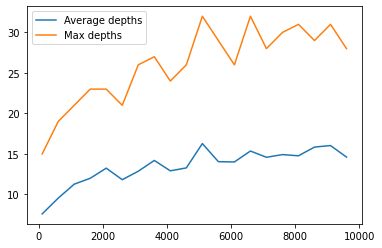

In [ ]:
# your code here
import matplotlib.pyplot as plt
import random

bst = BinarySearchTree()

lst = []
for i in range(100, 10000, 500):
    temp = list(range(i))
    random.shuffle(temp)
    lst.append(temp)

max_depths = []
average_depths = []

for i in lst:
    averages = []
    maxes = []
    for j in range(50):
        bst.root = Node(i[0])
        for n in i[1:]:
            bst.insert(Node(n))   
        averages.append(avg_depth(bst))
        maxes.append(max_depth(bst, bst.root))    
    average_depths.append(sum(averages)/len(averages))
    max_depths.append(sum(maxes)/len(maxes))
    
x = range(100, 10000, 500)
plt.plot(x, average_depths, label="Average depths")
plt.plot(x, max_depths, label="Max depths")
plt.legend()
plt.show()

##Question 6
Is the plot above in agreement with the theoretically expected result? Explain.



The foundings from the above graph matches with the expected result. Theoretically, average cases are better than worst cases. This is exactly why when one writes a code should think about average cases to see the general performance or behavior of the algorithms. As so, the graph of the max is plotted above the average cases. In general, the algorithm works better compared to the worst cases.
